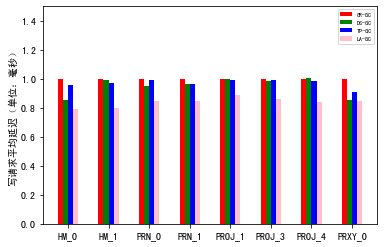

In [1]:
import numpy as np
import seaborn as sns
import sys
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
import pandas as pd
import scipy
import os
import sys
import matplotlib.pyplot as plt
from pylab import * 
import math
from numpy import cumsum

%matplotlib inline

#数据输入
def get_trace_reference(filename):
    
    file_base = open(filename)
    
    flag=0
    
    x = []
    
    while 1:
        
        base_lines = file_base.readlines(100000)
             
        if (not base_lines):
            
            break 
            
        for base_line in base_lines:

            if str(base_line).startswith("write request average response time:"): #以write request average response time:的行
                number = int(base_line.split()[5]) / 1e6
                x.append(number)

    file_base.close()
    
    return x

base1 = get_trace_reference("stat1.txt")
base2 = get_trace_reference("stat2.txt")
base3 = get_trace_reference("stat4.txt")
gc = get_trace_reference("stat3.txt")
labels = ["HM_0","HM_1","PRN_0","PRN_1","PROJ_1","PROJ_3","PROJ_4","PRXY_0"]
num = len(labels)  # the label locations
width = 0.35  # the width of the bars

base1_u = [1 for _ in base1]
base2_u = [a/b for a,b in zip(base2,base1)]
base3_u = [a/b for a,b in zip(base3,base1)]
gc_u = [a/b for a,b in zip(gc,base1)]
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots()

all_width = 4 # 三个条柱的总宽度
width = onset = all_width / 4 # 偏移量是一个条柱的宽度

x1 = [x-1.5* onset for x in range(0,8*num,8)]
x2 = [x-0.5* onset for x in range(0,8*num,8)]
x3 = [x+0.5* onset for x in range(0,8*num,8)]
x4 = [x+1.5* onset for x in range(0,8*num,8)]
# 绘图
ax.bar(x1, base1_u,onset,color='r', label='GR-GC')
ax.bar(x2, base2_u, onset,color='g', label='DS-GC')
ax.bar(x3, base3_u, onset, color='b',label='TP-GC')
ax.bar(x4, gc_u, onset, color='pink',label='LA-GC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('写请求平均延迟（单位：毫秒）')
ax.set_xticks(range(0,8*num,8))
ax.set_xticklabels(labels,fontsize=10)
ax.set_ylim(0,1.5)
ax.legend(fontsize=6)
plt.savefig("write_avg.png", bbox_inches = 'tight',dpi=1000)

In [2]:
1 - sum(gc_u) / len(gc_u)

0.15878819045031034

In [12]:
shape(base1)


(13,)

In [14]:
len(base1)

13

In [15]:
base1

[1.411283,
 10.627171,
 2.882548,
 2.434125,
 2.183558,
 5.630843,
 13.302142,
 0.572071,
 1.032713,
 7.999644,
 1.261306,
 5.617203,
 1.000842]